#### 1.Importing Libraries:

In [413]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [414]:
%matplotlib inline

In [415]:
pd.set_option("display.max_columns", 100)

#### 2. Data Loading:

In [416]:
df = pd.read_csv("bank marketing v2.csv")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,poutcome,deposit,p_recency
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,unknown,yes,None
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,unknown,yes,None
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,unknown,yes,None
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,unknown,yes,None
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,unknown,yes,None


#### 3. Data Checks:

In [417]:
df.shape

(11162, 15)

In [418]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
poutcome     object
deposit      object
p_recency    object
dtype: object

In [419]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  poutcome   11162 non-null  object
 13  deposit    11162 non-null  object
 14  p_recency  11162 non-null  object
dtypes: int64(4), object(11)
memory usage: 1.3+ MB


In [420]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
poutcome     0
deposit      0
p_recency    0
dtype: int64

In [421]:
# Checking Categorical Features:

cv = ["job","marital","education","default","housing","loan","contact","month","poutcome","deposit","p_recency"]

for i in cv:
    print(df[i].value_counts())
    print("-"*50)


management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64
--------------------------------------------------
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64
--------------------------------------------------
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64
--------------------------------------------------
no     10994
yes      168
Name: default, dtype: int64
--------------------------------------------------
no     5881
yes    5281
Name: housing, dtype: int64
--------------------------------------------------
no     9702
yes    1460
Name: loan, dtype: int64
--------------------------------------------------
cellular     8042
unknown      2346
telephone     774
Name: contact, d

#### 4. Exploratory Data Analysis:

In [422]:
# Binary mapping for Categorical Features:
df["default"] = df["default"].map({"yes":1,"no":0})
df["housing"] = df["housing"].map({"yes":1,"no":0})
df["loan"] = df["loan"].map({"yes":1,"no":0})
df["deposit"] = df["deposit"].map({"yes":1,"no":0})



In [423]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,poutcome,deposit,p_recency
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,unknown,1,None
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,unknown,1,None
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,unknown,1,None
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,unknown,1,None
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,unknown,1,None


* Univariate Analysis:

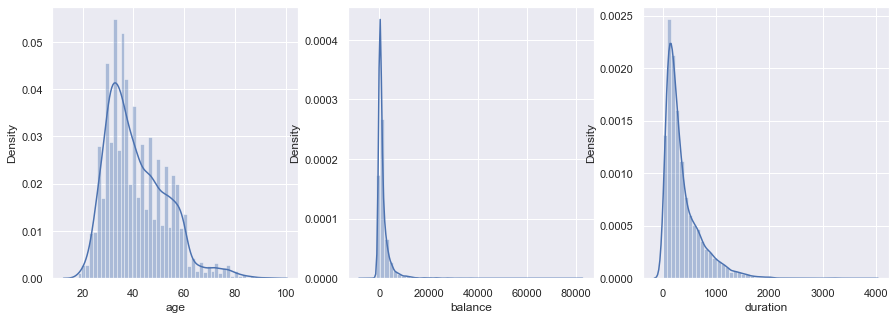

In [424]:
# Distribution plots - Numerical Features:

plt.figure(figsize=(15,5))
sns.set_theme()

plt.subplot(1,3,1)
sns.distplot(df["age"])

plt.subplot(1,3,2)
sns.distplot(df["balance"])

plt.subplot(1,3,3)
sns.distplot(df["duration"])

plt.show()

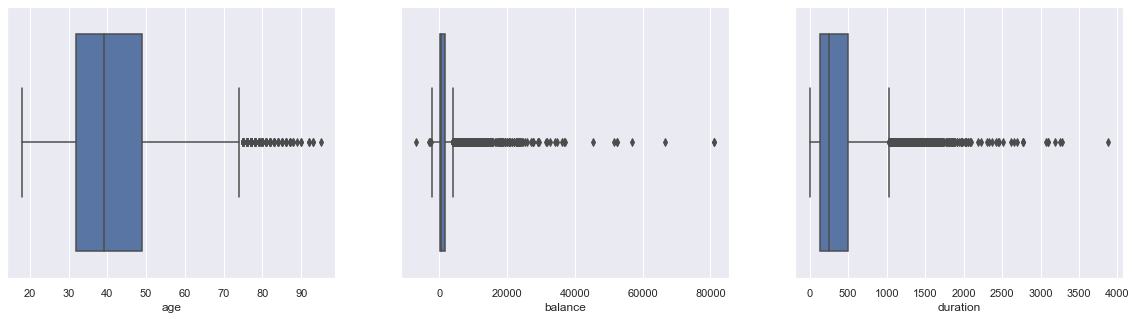

In [425]:
# Box plots - Numerical Features:

plt.figure(figsize=(20,5))
sns.set_theme()

plt.subplot(1,3,1)
sns.boxplot(df["age"])

plt.subplot(1,3,2)
sns.boxplot(df["balance"])

plt.subplot(1,3,3)
sns.boxplot(df["duration"])

plt.show()

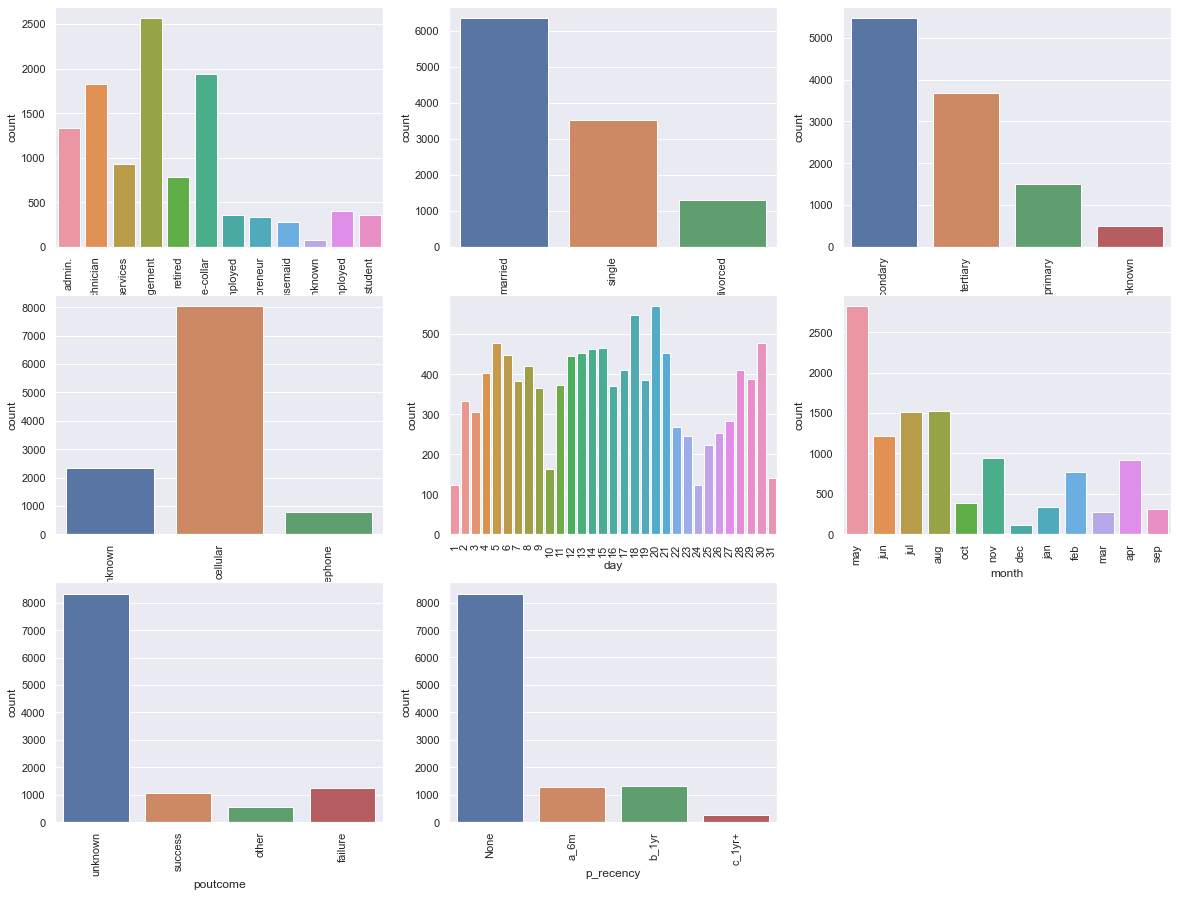

In [426]:
# Categorical Features:
plt.figure(figsize=(20,15))

plt.subplot(3,3,1)
sns.countplot(df["job"])
plt.xticks(rotation = 90)

plt.subplot(3,3,2)
sns.countplot(df["marital"])
plt.xticks(rotation = 90)

plt.subplot(3,3,3)
sns.countplot(df["education"])
plt.xticks(rotation = 90)

plt.subplot(3,3,4)
sns.countplot(df["contact"])
plt.xticks(rotation = 90)
                 
plt.subplot(3,3,5)
sns.countplot(df["day"])
plt.xticks(rotation = 90)
                 
plt.subplot(3,3,6)
sns.countplot(df["month"])
plt.xticks(rotation = 90)
                 
plt.subplot(3,3,7)
sns.countplot(df["poutcome"])
plt.xticks(rotation = 90)

                 
plt.subplot(3,3,8)
sns.countplot(df["p_recency"])
plt.xticks(rotation = 90)
                 
plt.show()

In [427]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,poutcome,deposit,p_recency
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,unknown,1,None
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,unknown,1,None
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,unknown,1,None
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,unknown,1,None
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,unknown,1,None


<AxesSubplot:xlabel='deposit', ylabel='count'>

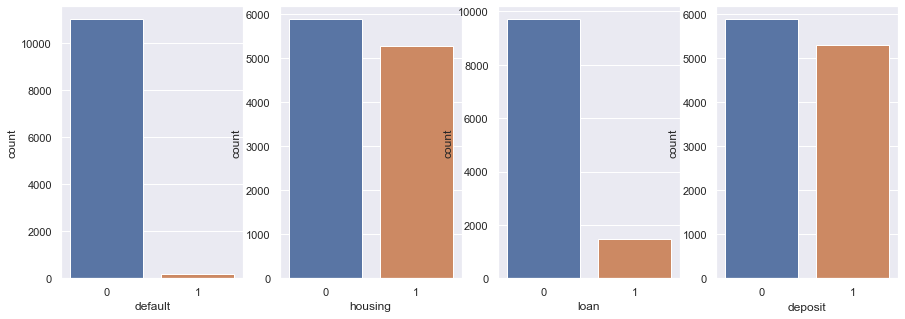

In [428]:
# Binary Categorical Variables:

plt.figure(figsize=(15,5))

plt.subplot(1,4,1)
sns.countplot(df["default"])
plt.subplot(1,4,2)
sns.countplot(df["housing"])
plt.subplot(1,4,3)
sns.countplot(df["loan"])
plt.subplot(1,4,4)
sns.countplot(df["deposit"])


In [429]:
# Class Imbalance:
df["deposit"].value_counts(normalize=True)*100

0    52.616019
1    47.383981
Name: deposit, dtype: float64

<AxesSubplot:>

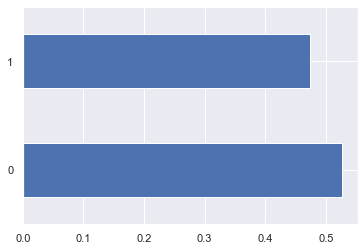

In [430]:
df["deposit"].value_counts(normalize=True).plot.barh()

* Bi- Variate Analysis:

<AxesSubplot:xlabel='default', ylabel='duration'>

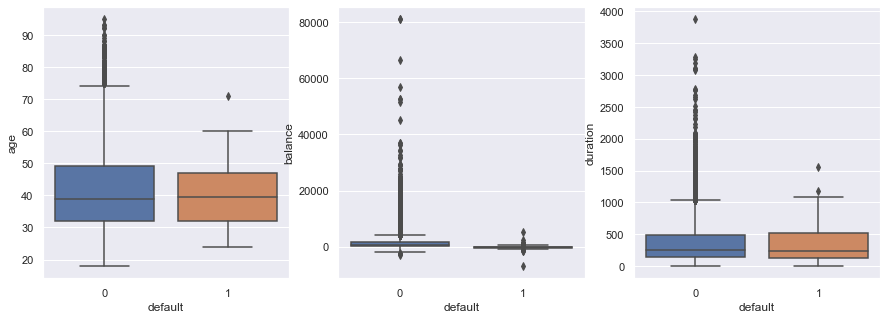

In [431]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x=df["default"], y=df["age"], data=df)
plt.subplot(1,3,2)
sns.boxplot(x=df["default"], y=df["balance"], data=df)
plt.subplot(1,3,3)
sns.boxplot(x=df["default"], y=df["duration"], data=df)

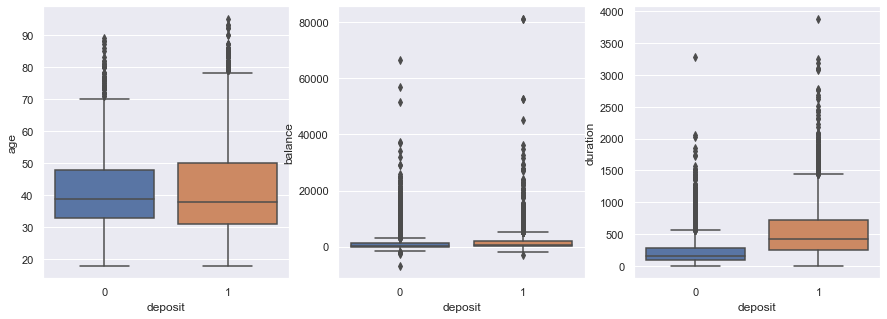

In [432]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x=df["deposit"], y=df["age"], data=df)
plt.subplot(1,3,2)
sns.boxplot(x=df["deposit"], y=df["balance"], data=df)
plt.subplot(1,3,3)
sns.boxplot(x=df["deposit"], y=df["duration"], data=df)

plt.show()

<Figure size 1080x216 with 0 Axes>

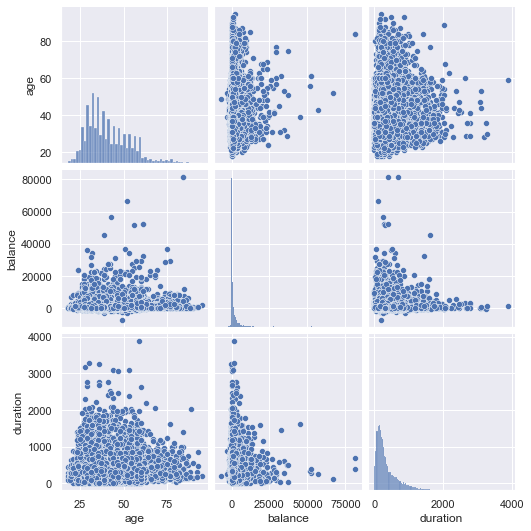

In [433]:
plt.figure(figsize=(15,3))
sns.pairplot(df[["age","balance","duration"]])
plt.show()

<AxesSubplot:xlabel='job', ylabel='count'>

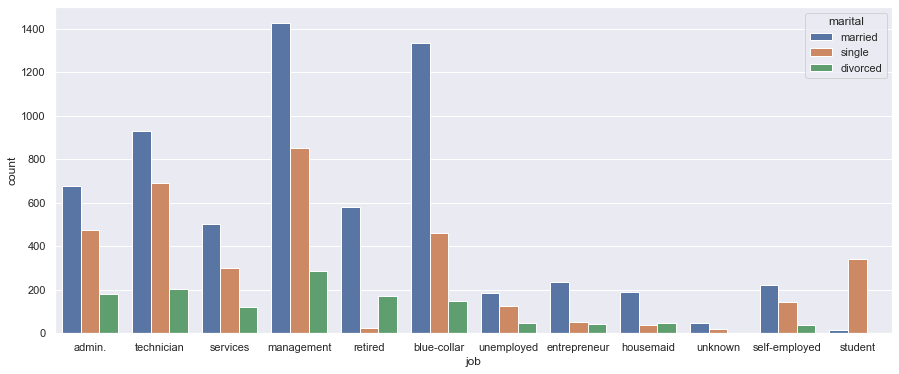

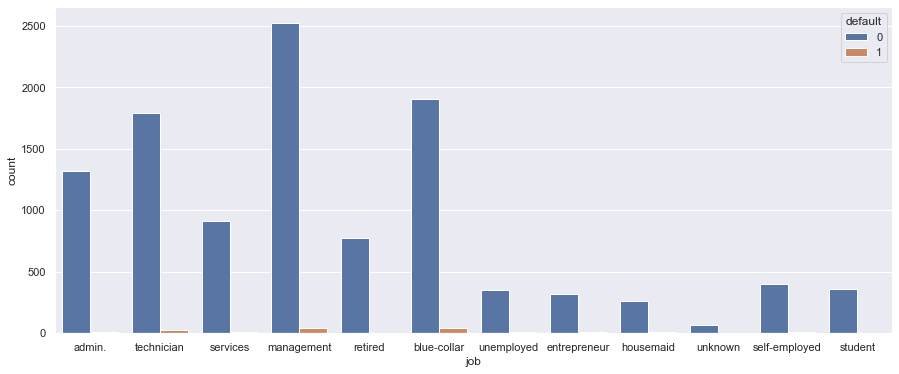

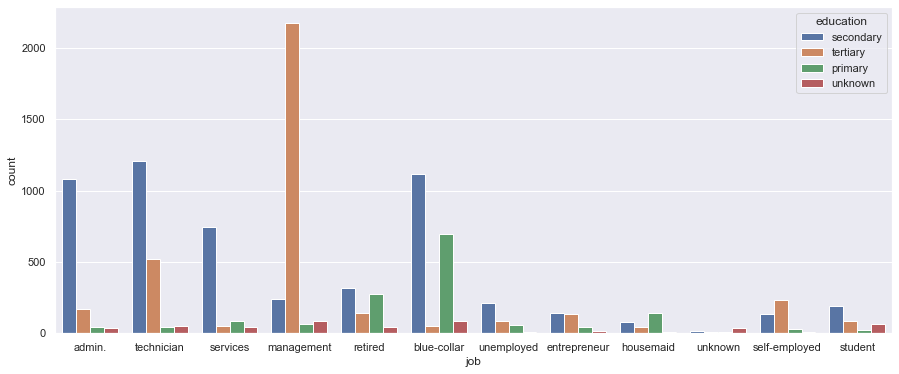

In [434]:

plt.figure(figsize=(15,6))
sns.countplot(x=df["job"],hue=df["marital"], data=df)

plt.figure(figsize=(15,6))
sns.countplot(x=df["job"],hue=df["default"], data=df)

plt.figure(figsize=(15,6))
sns.countplot(x=df["job"],hue=df["education"], data=df)


<AxesSubplot:>

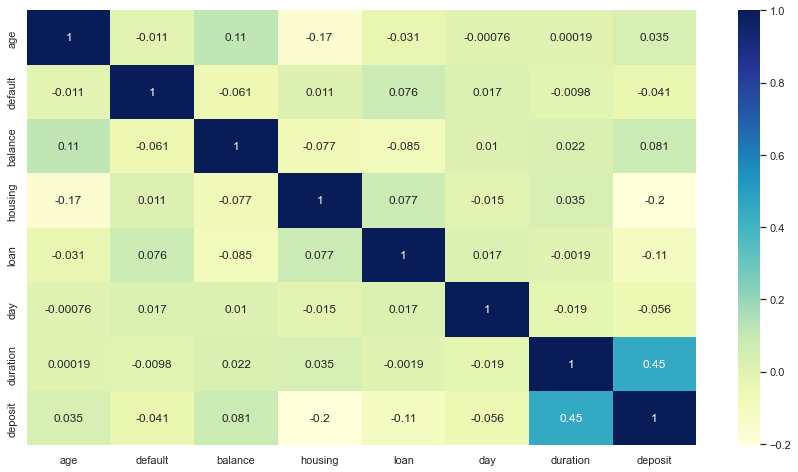

In [435]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True,cmap="YlGnBu")

#### 5. Data Preparation for model Building:

In [436]:
# Dropping Day and Duration Features:

df = df.drop(["day","duration"],axis=1)

In [437]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,poutcome,deposit,p_recency
0,59,admin.,married,secondary,0,2343,1,0,unknown,may,unknown,1,None
1,56,admin.,married,secondary,0,45,0,0,unknown,may,unknown,1,None
2,41,technician,married,secondary,0,1270,1,0,unknown,may,unknown,1,None
3,55,services,married,secondary,0,2476,1,0,unknown,may,unknown,1,None
4,54,admin.,married,tertiary,0,184,0,0,unknown,may,unknown,1,None


In [438]:
# Creating Dummy Features for job, marital, education, contact, month, poutcome,  p_recency:

df_dummies = ["job", "marital","education","contact","month","poutcome","p_recency"]

In [439]:
df_dummy_frames = pd.get_dummies(df[df_dummies], drop_first=True)
df_dummy_frames.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,p_recency_a_6m,p_recency_b_1yr,p_recency_c_1yr+
0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [440]:
df_dummy_frames.shape

(11162, 35)

In [441]:
# Dropping Categorical features:
df.drop(df_dummies, axis=1, inplace=True)
df.head()

,age,default,balance,housing,loan,deposit
0,59,0,2343,1,0,1
1,56,0,45,0,0,1
2,41,0,1270,1,0,1
3,55,0,2476,1,0,1
4,54,0,184,0,0,1


In [442]:
# Adding the Data frames:
df = pd.concat([df,df_dummy_frames], axis=1)
df.head()

,age,default,balance,housing,loan,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,p_recency_a_6m,p_recency_b_1yr,p_recency_c_1yr+
0,59,0,2343,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1,56,0,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,41,0,1270,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,55,0,2476,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
4,54,0,184,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [443]:
df.shape

(11162, 41)

In [444]:
df.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'deposit',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'p_recency_a_6m', 'p_recency_b_1yr',
       'p_recency_c_1yr+'],
      dtype='object')

#### 6. Splitting Training and Testing Data:

In [445]:
from sklearn.model_selection import train_test_split

In [446]:
# Splitting Train and Test data:

df_train , df_test = train_test_split(df, train_size=0.8, random_state=100, stratify=df["deposit"])


In [447]:
print(df_train.shape)
print(df_test.shape)

(8929, 41)
(2233, 41)


In [448]:
print(df_train["deposit"].value_counts(normalize=True))
print("-"*20)
print(df_test["deposit"].value_counts(normalize=True))


0    0.526151
1    0.473849
Name: deposit, dtype: float64
--------------------
0    0.526198
1    0.473802
Name: deposit, dtype: float64


#### 7. Feature Scaling:

In [449]:
from sklearn.preprocessing import MinMaxScaler

In [450]:
scaler = MinMaxScaler()

In [451]:
df_train[["age","balance"]].describe()

,age,balance
count,8929.000000,8929.000000
mean,41.147945,1509.395117
std,11.848750,3193.242289
min,18.000000,-6847.000000
25%,32.000000,116.000000
50%,39.000000,541.000000
75%,49.000000,1693.000000
max,95.000000,81204.000000


In [452]:
df_train[["age","balance"]] = scaler.fit_transform(df_train[["age","balance"]])
df_train.head()

,age,default,balance,housing,loan,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,p_recency_a_6m,p_recency_b_1yr,p_recency_c_1yr+
7976,0.376623,0,0.101930,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
10101,0.324675,0,0.117716,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
9070,0.194805,0,0.155478,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0
3546,0.376623,0,0.106154,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
465,0.142857,0,0.085644,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [453]:
df_train.describe()

,age,default,balance,housing,loan,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,p_recency_a_6m,p_recency_b_1yr,p_recency_c_1yr+
count,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.00000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000
mean,0.300623,0.016351,0.094904,0.477097,0.130250,0.473849,0.177959,0.028671,0.024415,0.230709,0.068877,0.034942,0.080188,0.032366,0.165640,0.032254,0.006160,0.571733,0.315265,0.488073,0.331616,0.044574,0.069997,0.214694,0.135737,0.009968,0.070109,0.030239,0.134506,0.108971,0.024975,0.255908,0.083660,0.035950,0.028447,0.04659,0.093628,0.750588,0.113675,0.114235,0.021615
std,0.153880,0.126829,0.036266,0.499503,0.336597,0.499344,0.382500,0.166888,0.154342,0.421310,0.253259,0.183644,0.271599,0.176981,0.371778,0.176685,0.078246,0.494855,0.464647,0.499886,0.470820,0.206378,0.255156,0.410633,0.342529,0.099344,0.255344,0.171253,0.341214,0.311620,0.156057,0.436395,0.276893,0.186177,0.166254,0.21077,0.291326,0.432697,0.317433,0.318114,0.145431
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.000000,0.079079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.272727,0.000000,0.083906,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.402597,0.000000,0.096989,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [454]:
# for test data:

df_test[["age","balance"]] = scaler.transform(df_test[["age","balance"]])

In [455]:
df_test.describe()

,age,default,balance,housing,loan,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,p_recency_a_6m,p_recency_b_1yr,p_recency_c_1yr+
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,0.306076,0.009852,0.095991,0.457232,0.133005,0.473802,0.158979,0.032244,0.025078,0.226601,0.072996,0.041648,0.092700,0.031796,0.154053,0.030900,0.006717,0.557994,0.314823,0.500672,0.326019,0.044335,0.066726,0.192118,0.137483,0.009404,0.067174,0.033139,0.140170,0.111509,0.023735,0.241379,0.087774,0.031796,0.029109,0.054187,0.105240,0.727273,0.118227,0.128527,0.026422
std,0.157990,0.098790,0.038053,0.498279,0.339656,0.499425,0.365738,0.176686,0.156398,0.418726,0.260188,0.199828,0.290077,0.175495,0.361080,0.173086,0.081702,0.496737,0.464549,0.500112,0.468859,0.205884,0.249603,0.394054,0.344434,0.096541,0.250380,0.179040,0.347241,0.314832,0.152256,0.428016,0.283030,0.175495,0.168149,0.226437,0.306931,0.445462,0.322949,0.334750,0.160422
min,0.000000,0.000000,0.051845,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.000000,0.079306,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.272727,0.000000,0.084428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.402597,0.000000,0.097989,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,0.974026,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### 8. Model Building:

In [456]:
x_train = df_train.drop("deposit", axis=1)
y_train = df_train["deposit"]
x_test = df_test.drop("deposit", axis=1)
y_test = df_test["deposit"]

In [457]:
print(x_train.shape)
print("-"*20)
print(x_test.shape)

(8929, 40)
--------------------
(2233, 40)


* Model Building - Logistic Regression:

In [458]:
from sklearn.linear_model import LogisticRegression

In [459]:
logreg = LogisticRegression(random_state=100)

In [460]:
logreg.fit(x_train,y_train)

LogisticRegression(random_state=100)

* Model Evaluation on Train set:

In [461]:
y_train_pred = logreg.predict(x_train)

In [462]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [463]:
print(accuracy_score(y_train,y_train_pred))

0.7034382349647217


In [464]:
print(confusion_matrix(y_train,y_train_pred))

[[3837  861]
 [1787 2444]]


In [465]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.68      0.82      0.74      4698
           1       0.74      0.58      0.65      4231

    accuracy                           0.70      8929
   macro avg       0.71      0.70      0.70      8929
weighted avg       0.71      0.70      0.70      8929



* Model Evaluation on Test Set:

In [466]:
y_test_pred = logreg.predict(x_test)

In [467]:
print(accuracy_score(y_test,y_test_pred))

0.7093596059113301


* Model Building - Random Forest

In [468]:
from sklearn.ensemble import RandomForestClassifier

In [469]:
rf = RandomForestClassifier(random_state=100,n_estimators = 50, oob_score = True)

In [470]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=100)

* Model Evaluation on Train set:

In [471]:
y_train_pred = rf.predict(x_train)


In [472]:
print(accuracy_score(y_train, y_train_pred))

0.9985440698846455


* Model Evaluation on Test Set:

In [473]:
y_test_pred = rf.predict(x_test)

In [474]:
print(accuracy_score(y_test,y_test_pred))

0.7008508732646663


#### 9. Cross Validation:

In [475]:
from sklearn.model_selection import cross_val_score

In [476]:
# Crosss Validation - Logistic Regression (Accuracy metric):

cross_val_score(logreg,x_train, y_train, cv = 5, n_jobs=-1)

array([0.6825308 , 0.69988802, 0.6987682 , 0.70828667, 0.70140056])

In [477]:
cross_val_score(logreg,x_train, y_train, cv = 5, n_jobs=-1).mean()

0.698174848886923

In [478]:
# Cross Validation - Random Forest(Accuracy metric):
cross_val_score(rf,x_train, y_train, cv = 5, n_jobs=-1)


array([0.68868981, 0.6881299 , 0.69708847, 0.693729  , 0.69467787])

In [479]:
cross_val_score(rf,x_train, y_train, cv = 5, n_jobs=-1).mean()

0.6924630098399943

NOTE:Logistic Regression Algorithm  is slightly doing better compared to the Random Forest Algorithm 

* OOB Score in Random Forest Model:

In [480]:
rf.oob_score_     # >>> OOB in RF is somewhat similar to cross Validation score

0.6820472617314369

In [481]:
import sklearn

In [482]:
# Choosing Other metrics to check cross validation score:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [483]:
# Cross Validation - Random Forest (recall metric)
cross_val_score(rf,x_train,y_train, cv = 5, n_jobs=-1,scoring="recall")

array([0.61465721, 0.62529551, 0.63829787, 0.6068477 , 0.64184397])

#### 10. Feature Selection:

* Recursive Feature Selection:

In [484]:
from sklearn.feature_selection import RFE

In [485]:
logreg = LogisticRegression(random_state=100)

In [486]:
rfe = RFE(estimator=logreg, n_features_to_select=10)

In [487]:
rfe = rfe.fit(x_train,y_train)

In [488]:
rfe

RFE(estimator=LogisticRegression(random_state=100), n_features_to_select=10)

In [489]:
rfe.support_

array([False, False,  True,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False,  True, False, False,  True,  True, False,  True,
       False, False, False,  True])

In [490]:
rfe.ranking_

array([17, 26,  1,  1, 11, 30, 21, 12, 22,  9, 20, 27,  1, 31, 15, 25, 10,
       24, 18, 16, 19,  8,  1,  3,  1,  7,  2,  4, 29,  1,  6,  5,  1,  1,
       13,  1, 28, 23, 14,  1])

In [491]:
x_train.columns[rfe.support_]

Index(['balance', 'housing', 'job_student', 'contact_unknown', 'month_dec',
       'month_mar', 'month_oct', 'month_sep', 'poutcome_success',
       'p_recency_c_1yr+'],
      dtype='object')

In [492]:
featuress = x_train.columns[rfe.support_]
featuress

Index(['balance', 'housing', 'job_student', 'contact_unknown', 'month_dec',
       'month_mar', 'month_oct', 'month_sep', 'poutcome_success',
       'p_recency_c_1yr+'],
      dtype='object')

In [495]:
x_train2 = x_train[featuress]

* Evaluation - Cross valuation Score

In [496]:
# Cross Valuation Score for Logistic Regression:

cross_val_score(logreg,x_train2, y_train, n_jobs=-1)

array([0.67805151, 0.68421053, 0.68085106, 0.66797312, 0.69915966])

#### Cross Validation for Feature Selection:

In [497]:
num_features = x_train.shape
num_features[1]

40

In [498]:
cv_scores = []

In [499]:
logreg = LogisticRegression(random_state=100)

In [500]:
for features in range(1,num_features[1]+1):
    rfe = RFE(logreg, n_features_to_select=features)
    scores = cross_val_score(rfe,x_train,y_train, cv=4)
    cv_scores.append(scores.mean())

In [501]:
print(cv_scores)

[0.568488445956466, 0.6067873234169119, 0.6180988937523977, 0.6228023922684657, 0.6326581703736877, 0.6486731890652915, 0.6506890672977993, 0.6580806375369779, 0.6608803653088969, 0.6817115919243283, 0.6789109111133582, 0.6777919931076215, 0.6873109973082164, 0.6950389903323719, 0.6931347681486725, 0.6950388398525218, 0.692351721168462, 0.6945917140577874, 0.6955995779341163, 0.6968318574269631, 0.6970558717638807, 0.6991837571648472, 0.6967203016980548, 0.6960483088472522, 0.6966081942096958, 0.6968322587065634, 0.696048007887552, 0.6959357499193427, 0.6976157571263245, 0.6981758431285684, 0.699183456205147, 0.6995196281903735, 0.700191621041176, 0.7000797643525675, 0.7001918216809763, 0.7004158360178938, 0.6991837571648472, 0.6991837070048972, 0.6991837571648473, 0.6995197786702236]


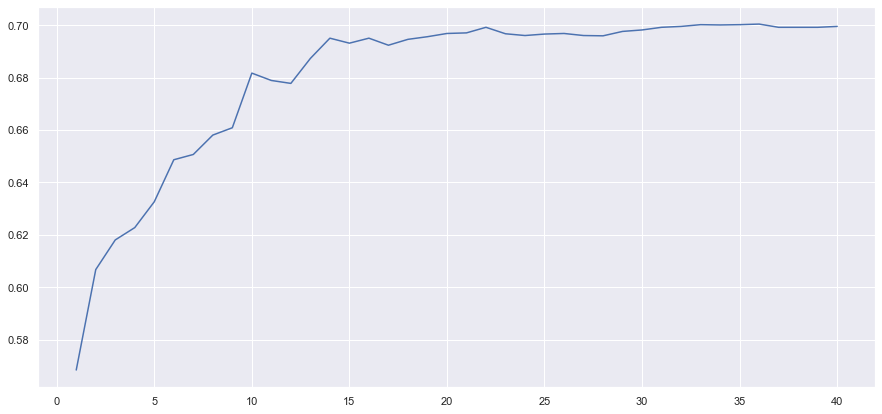

In [502]:
plt.figure(figsize=(15,7))
plt.plot(range(1,num_features[1]+1), cv_scores)

#### Using RFECV:

In [503]:
from sklearn.feature_selection import RFECV

In [504]:
rfecv = RFECV(estimator=logreg, cv = 4)

In [505]:
%%time
rfecv.fit(x_train,y_train)

Wall time: 9.6 s


RFECV(cv=4, estimator=LogisticRegression(random_state=100))

In [506]:
rfecv.grid_scores_

array([0.56848845, 0.60678732, 0.61809889, 0.62280239, 0.63265817,
       0.64867319, 0.65068907, 0.65808064, 0.66088037, 0.68171159,
       0.67891091, 0.67779199, 0.687311  , 0.69503899, 0.69313477,
       0.69503884, 0.69235172, 0.69459171, 0.69559958, 0.69683186,
       0.69705587, 0.69918376, 0.6967203 , 0.69604831, 0.69660819,
       0.69683226, 0.69604801, 0.69593575, 0.69761576, 0.69817584,
       0.69918346, 0.69951963, 0.70019162, 0.70007976, 0.70019182,
       0.70041584, 0.69918376, 0.69918371, 0.69918376, 0.69951978])

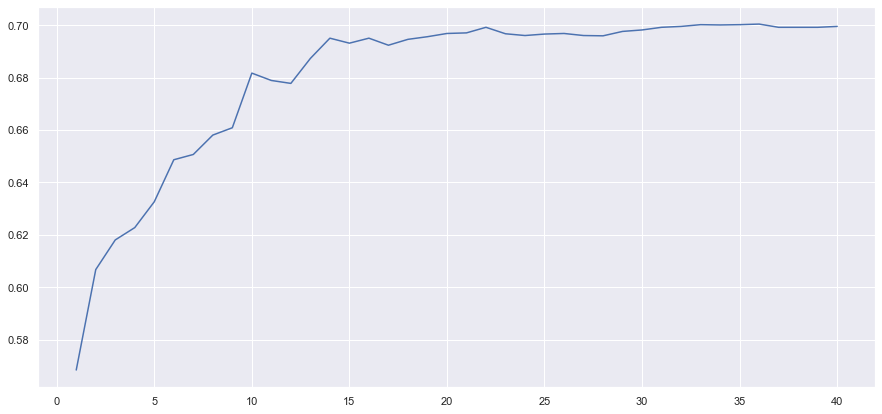

In [507]:
plt.figure(figsize=(15,7))
plt.plot(range(1,num_features[1]+1), rfecv.grid_scores_)

In [508]:
rfecv.n_features_

36

#### 11. Hyper Tuning - Cross Validation: 

In [509]:
from sklearn.ensemble import RandomForestClassifier

In [510]:
rf = RandomForestClassifier(random_state=100, n_jobs=-1)

In [511]:
from sklearn.model_selection import GridSearchCV

In [512]:
params = {"max_depth": [3, 5, 10, 15, 20],
         "max_features": [3,5,7,11,15],
         "min_samples_leaf":[20,50,100,200,400],
         "n_estimators": [10,25,50,80,100]}

In [513]:
Grid_search = GridSearchCV(estimator=rf, param_grid=params, n_jobs=-1, verbose=1,cv = 5, return_train_score=True )

In [514]:
Grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 625 candidates, totalling 3125 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'max_features': [3, 5, 7, 11, 15],
                         'min_samples_leaf': [20, 50, 100, 200, 400],
                         'n_estimators': [10, 25, 50, 80, 100]},
             return_train_score=True, verbose=1)

In [515]:
Grid_search.best_score_

0.7126220432181831

In [516]:
Grid_search.best_estimator_

RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=20,
                       n_jobs=-1, random_state=100)

In [517]:
cv_df = pd.DataFrame(Grid_search.cv_results_)
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.145459,0.007614,0.047424,0.013688,3,3,20,10,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.669093,0.681411,0.679731,0.678611,0.683473,0.678464,0.004964,420,0.679686,0.680386,0.679266,0.685986,0.684071,0.681879,0.002666
1,0.253358,0.033343,0.144128,0.041028,3,3,20,25,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.681971,0.692609,0.689250,0.680851,0.675070,0.683950,0.006252,373,0.695926,0.687386,0.684446,0.688506,0.686030,0.688459,0.003973
2,0.478714,0.051285,0.104104,0.023726,3,3,20,50,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.686450,0.698768,0.688690,0.686450,0.690756,0.690223,0.004563,288,0.702646,0.695926,0.696486,0.694666,0.693029,0.696551,0.003271
3,0.831894,0.082943,0.159304,0.055154,3,3,20,80,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.681971,0.699328,0.689250,0.687010,0.689636,0.689439,0.005649,300,0.696626,0.695926,0.693546,0.692426,0.692609,0.694227,0.001730
4,1.193332,0.051706,0.160804,0.030328,3,3,20,100,"{'max_depth': 3, 'max_features': 3, 'min_sampl...",0.680851,0.698208,0.686450,0.687570,0.682913,0.687199,0.006009,332,0.695086,0.694246,0.689906,0.690746,0.689810,0.691959,0.002250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
620,0.376438,0.190787,0.241471,0.188566,20,15,400,10,"{'max_depth': 20, 'max_features': 15, 'min_sam...",0.659574,0.693169,0.669653,0.674132,0.688515,0.677009,0.012328,447,0.683046,0.682206,0.671147,0.686266,0.679171,0.680367,0.005134
621,0.391153,0.053283,0.169566,0.098149,20,15,400,25,"{'max_depth': 20, 'max_features': 15, 'min_sam...",0.663494,0.680291,0.667973,0.659015,0.672269,0.668608,0.007328,580,0.678846,0.676886,0.665687,0.679406,0.677632,0.675692,0.005080
622,0.627933,0.074006,0.171864,0.072934,20,15,400,50,"{'max_depth': 20, 'max_features': 15, 'min_sam...",0.667413,0.689810,0.683651,0.667973,0.676751,0.677119,0.008737,444,0.684726,0.680386,0.675766,0.682766,0.676512,0.680031,0.003471
623,1.010517,0.108977,0.424112,0.184221,20,15,400,80,"{'max_depth': 20, 'max_features': 15, 'min_sam...",0.668533,0.687010,0.680291,0.669093,0.679552,0.676896,0.007095,455,0.686966,0.681366,0.677306,0.683746,0.678331,0.681543,0.003537


In [518]:
cv_df = cv_df.sort_values(by = ["rank_test_score"])
cv_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
529,1.224921,0.074319,0.222548,0.071012,20,5,20,100,"{'max_depth': 20, 'max_features': 5, 'min_samp...",0.708847,0.716125,0.714446,0.708847,0.714846,0.712622,0.003132,1,0.727845,0.729245,0.729105,0.733305,0.731523,0.730205,0.001952
527,0.738486,0.111438,0.242092,0.102166,20,5,20,50,"{'max_depth': 20, 'max_features': 5, 'min_samp...",0.704367,0.715006,0.718365,0.710526,0.713725,0.712398,0.004736,2,0.727425,0.729945,0.727985,0.732045,0.731243,0.729729,0.001792
402,0.429065,0.050311,0.121760,0.038481,15,5,20,50,"{'max_depth': 15, 'max_features': 5, 'min_samp...",0.707727,0.708847,0.712206,0.712206,0.718207,0.711839,0.003652,3,0.728125,0.728405,0.727985,0.730785,0.728303,0.728721,0.001042
404,0.968691,0.084603,0.133920,0.024499,15,5,20,100,"{'max_depth': 15, 'max_features': 5, 'min_samp...",0.707167,0.712766,0.713326,0.711646,0.714286,0.711838,0.002487,4,0.727425,0.726025,0.729105,0.731065,0.730823,0.728889,0.001942
528,0.961480,0.161496,0.393377,0.106302,20,5,20,80,"{'max_depth': 20, 'max_features': 5, 'min_samp...",0.707727,0.711086,0.715006,0.709966,0.713725,0.711502,0.002608,5,0.727285,0.728685,0.728825,0.731065,0.730543,0.729281,0.001365


In [519]:
sel_cols = ["param_max_depth","param_max_features","param_min_samples_leaf","param_n_estimators",
            "rank_test_score", "mean_train_score","mean_test_score"]

In [520]:
cv_df.sort_values(by = "rank_test_score")[sel_cols].head(20)

,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,rank_test_score,mean_train_score,mean_test_score
529,20,5,20,100,1,0.730205,0.712622
527,20,5,20,50,2,0.729729,0.712398
402,15,5,20,50,3,0.728721,0.711839
404,15,5,20,100,4,0.728889,0.711838
528,20,5,20,80,5,0.729281,0.711502
403,15,5,20,80,6,0.728693,0.710718
278,10,5,20,80,7,0.723009,0.710606
376,15,3,20,25,8,0.719565,0.710381
428,15,7,20,80,9,0.733425,0.710271
279,10,5,20,100,10,0.723485,0.709822


In [521]:
# Understanding the better: Effect of Hyper Parameter:

cv_df.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'param_max_features', 'param_min_samples_leaf',
       'param_n_estimators', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')

In [522]:
cv_df.groupby("param_max_depth")["mean_train_score", "mean_test_score"].mean()

,mean_train_score,mean_test_score
param_max_depth,,
3,0.679182,0.674851
5,0.692787,0.687117
10,0.701377,0.691649
15,0.703504,0.691942
20,0.703756,0.692096


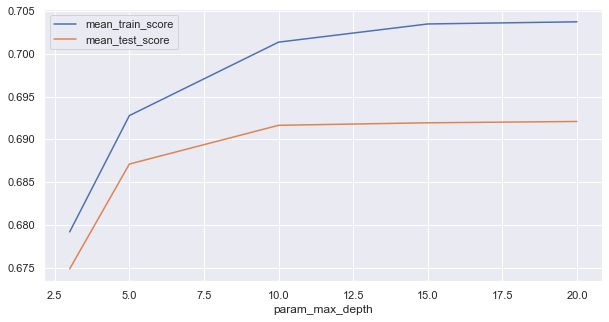

In [523]:
cv_df.groupby("param_max_depth")["mean_train_score", "mean_test_score"].mean().plot(figsize = [10,5])
plt.show()

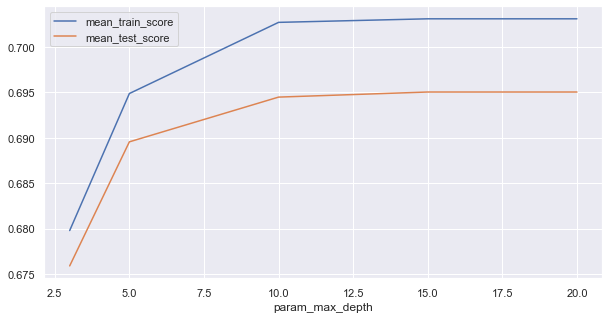

In [524]:
cv_df.groupby("param_max_depth")["mean_train_score", "mean_test_score"].agg(np.median).plot(figsize = [10,5])
plt.show()

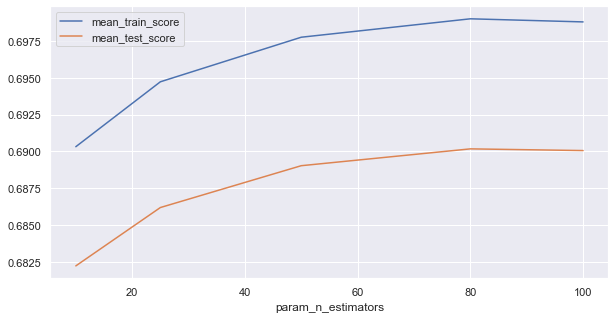

In [525]:
cv_df.groupby("param_n_estimators")["mean_train_score", "mean_test_score"].agg(np.mean).plot(figsize = [10,5])
plt.show()

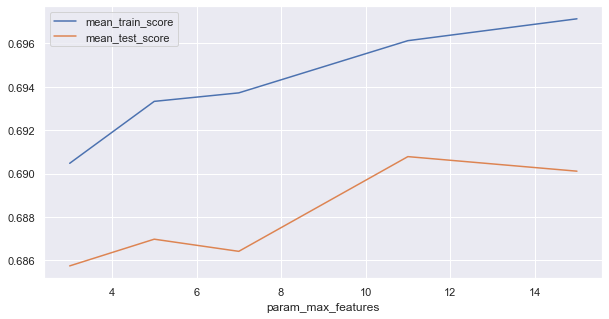

In [526]:
cv_df.groupby("param_max_features")["mean_train_score", "mean_test_score"].agg(np.median).plot(figsize = [10,5])
plt.show()

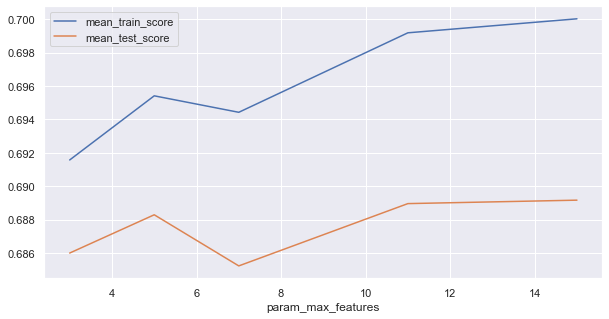

In [527]:
cv_df.groupby("param_max_features")["mean_train_score", "mean_test_score"].agg(np.mean).plot(figsize = [10,5])
plt.show()

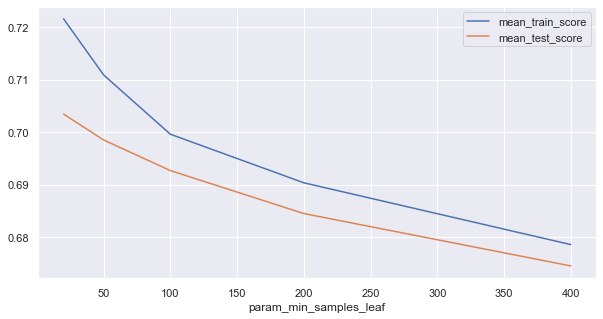

In [528]:
cv_df.groupby("param_min_samples_leaf")["mean_train_score", "mean_test_score"].agg(np.median).plot(figsize = [10,5])
plt.show()

* Fine Tuning using Grid Search:

In [529]:
params  = {"min_samples_leaf" : [5,10,20,50],
          "n_estimators": [50,60,70],
          "max_features": [10,12,14,16]}

In [530]:
rf = RandomForestClassifier(max_depth=12, random_state=100, n_jobs=-1)

In [531]:
Grid_search2 = GridSearchCV(estimator=rf, 
                           param_grid=params,
                           verbose=1,
                           cv = 5,
                           return_train_score=True,
                           n_jobs=-1)

In [532]:
Grid_search2.fit(x_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=12, n_jobs=-1,
                                              random_state=100),
             n_jobs=-1,
             param_grid={'max_features': [10, 12, 14, 16],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'n_estimators': [50, 60, 70]},
             return_train_score=True, verbose=1)

In [533]:
Grid_search2.best_score_

0.7129580522018438

In [534]:
Grid_search2.best_estimator_

RandomForestClassifier(max_depth=12, max_features=12, min_samples_leaf=5,
                       n_estimators=70, n_jobs=-1, random_state=100)

* Hyper Tuning - RandomizedSearchCV:

In [540]:
from sklearn.model_selection import RandomizedSearchCV

In [541]:
params = {"max_depth":range(3,20),
         "max_features":range(3,17),
         "min_samples_leaf":range(20,400,50),
         "n_estimators":range(10,101,10)}

In [542]:
rscv = RandomizedSearchCV(estimator=rf, param_distributions=params,
                         verbose=1, cv=5,
                         return_train_score=True, n_jobs=-1,
                         n_iter=50)

In [543]:
rscv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=12, n_jobs=-1,
                                                    random_state=100),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': range(3, 20),
                                        'max_features': range(3, 17),
                                        'min_samples_leaf': range(20, 400, 50)},
                   return_train_score=True, verbose=1)

In [544]:
rscv.best_score_

0.7091493439481056

In [545]:
Grid_search.best_score_

0.7126220432181831

In [546]:
Grid_search2.best_score_

0.7129580522018438

#### 12. Exrtacting the Best Model:

In [547]:
rf_best = Grid_search2.best_estimator_
rf_best

RandomForestClassifier(max_depth=12, max_features=12, min_samples_leaf=5,
                       n_estimators=70, n_jobs=-1, random_state=100)

In [548]:
y_test_pred = rf_best.predict(x_test)

In [549]:
y_test_pred

array([0, 1, 0, ..., 1, 1, 0], dtype=int64)

In [550]:
accuracy_score(y_test, y_test_pred)

0.7299596954769368

In [551]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76      1175
           1       0.76      0.63      0.69      1058

    accuracy                           0.73      2233
   macro avg       0.74      0.72      0.72      2233
weighted avg       0.73      0.73      0.73      2233



##### Final Model is having accuracy of 72%